# CS4442
## ASSIGNMENT 2
## ASHWIN SINGH (250 955 585)
## MARCH 6, 2022




# Import and display data
Perform data reshaping to view images.

a) Display 200th image

In [1]:
import numpy as np
import pandas as pd

data = np.genfromtxt('/content/faces.dat')
data.shape

(400, 4096)

Reshape images from row of pixel values to a 64 x 64 square

In [2]:
images = data.reshape(400, 64, 64)
#Apply image rotation so faces in correct orientation
images = np.rot90(images, axes=(2, 1))
images.shape

(400, 64, 64)

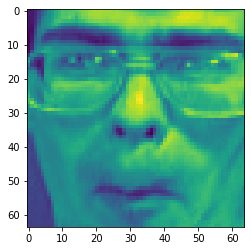

In [3]:
from matplotlib import pyplot as plt
plt.imshow(images[199], interpolation='None')
plt.show()

Remove mean and display 100th image

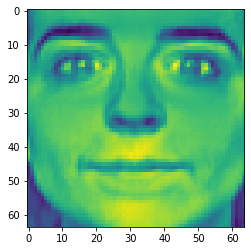

In [4]:
#axis-0 along the rows, hence take the mean across all image samples
mean = images.mean(axis=0) 
rem_mean_images = images - mean 
plt.imshow(rem_mean_images[99], interpolation='None')
plt.show()

# Apply PCA
c) Compute principal components and analyze their properties

Apply Scikit Learn to compute principal components

In [5]:
reshaped_images_removed_mean = data.reshape(400, 4096)

from sklearn.decomposition import PCA

pca = PCA(n_components=400)
pca.fit(reshaped_images_removed_mean)

PCA(n_components=400)

Check that the eigenvalues computed from PCA are in sorted order already. Given that is the case can directly take the corresponding eigenvectors.

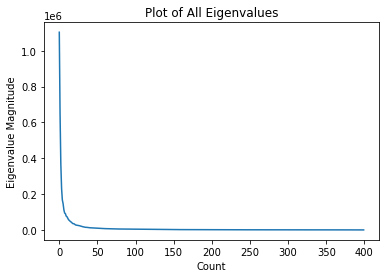

In [6]:
eigenvals = pca.explained_variance_
plt.plot([eigenvals[i].real for i in range(len(eigenvals))])
plt.title("Plot of All Eigenvalues")
plt.xlabel("Count")
plt.ylabel("Eigenvalue Magnitude")
plt.show()

Compute the variance contributed by the first d principal components and later use that to decide how many principal components to use.

In [7]:
explained_var = []
running_sum = 0

eigval_sum = 0
for j in range(len(eigenvals)):
  eigval_sum += eigenvals[j]

for i in range(len(eigenvals)):
  running_sum += eigenvals[i]
  explained_var.append(running_sum/eigval_sum)

d) Analyzing eigenvalues and explaining why 400th eigenvalue is zero.

In [8]:
eigenvals[399]

1.752318240269586e-25

Scikit Learn's implementation of principal component analysis takes the minimum of the number of samples and the dimensionality of data as the number of components. Hence for a sample of 400 x 64 x 64 images, it will take the sample size of 400 which is smaller than the dimensionality of 4096 (64 x 64) to produce 400 components.

Each principal component contributes variance encoding information about the underlying dataset. The amount of variance encoded can be shown mathematically through the principal component's corresponding eigenvalue. A higher eigenvalue means more variance is attributed by this component. There are a finite number of components which when combined will cumulatively all contribute to a maximum variance of one in the dataset. Hence for components sorted by eigenvalue, each corresponding one will have a lower eigenvalue until the last component. The last component’s eigenvalue will be extremely small, since almost all variance has already been explained by prior components. This is evidently the case as shown above where the eigenvalue is so small that it is negligible.

e) Explain dimensionality selected based on eigenvalues.


It is evident that the majority of the model's variance is encoded within the first 75 principal components by the graph below. Over 90% of the variance in the dataset is encapsulated there, so only 75 components are needed to effectively reconstruct the dataset.

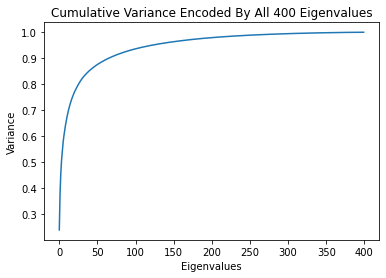

In [9]:
plt.plot(explained_var)
plt.title("Cumulative Variance Encoded By All 400 Eigenvalues")
plt.xlabel("Eigenvalues")
plt.ylabel("Variance")
plt.show()

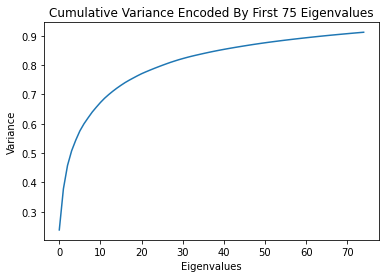

In [10]:
plt.plot(explained_var[:75])
plt.title("Cumulative Variance Encoded By First 75 Eigenvalues")
plt.xlabel("Eigenvalues")
plt.ylabel("Variance")
plt.show()

f) Display the top 5 eigenvectors


It is evident based on the variance-encoding plots that the eigenvalues are sorted in descending order. Eigenvectors correspond to eigenvalues in-order, hence use that to plot the first 5 most significant eigenvectors. Reshape each eigenvector (principal component) and rotate it first.

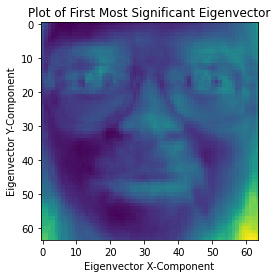

In [11]:
reshaped_eigface = np.rot90(pca.components_[0].reshape(64, 64), k=1, axes=(1,0))
plt.imshow(reshaped_eigface)
plt.title("Plot of First Most Significant Eigenvector")
plt.xlabel("Eigenvector X-Component")
plt.ylabel("Eigenvector Y-Component")
plt.show()

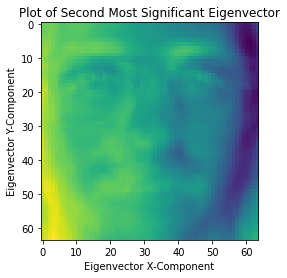

In [12]:
reshaped_eigface = np.rot90(pca.components_[1].reshape(64, 64), k=1, axes=(1,0))
plt.imshow(reshaped_eigface)
plt.title("Plot of Second Most Significant Eigenvector")
plt.xlabel("Eigenvector X-Component")
plt.ylabel("Eigenvector Y-Component")
plt.show()

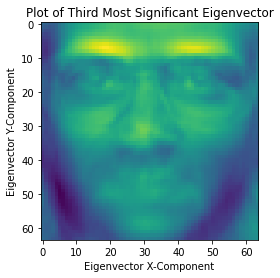

In [13]:
reshaped_eigface = np.rot90(pca.components_[2].reshape(64, 64), k=1, axes=(1,0))
plt.imshow(reshaped_eigface)
plt.title("Plot of Third Most Significant Eigenvector")
plt.xlabel("Eigenvector X-Component")
plt.ylabel("Eigenvector Y-Component")
plt.show()

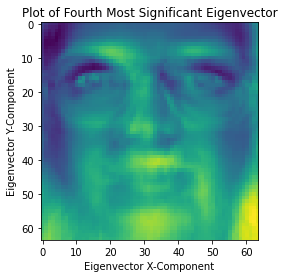

In [14]:
reshaped_eigface = np.rot90(pca.components_[3].reshape(64, 64), k=1, axes=(1,0))
plt.imshow(reshaped_eigface)
plt.title("Plot of Fourth Most Significant Eigenvector")
plt.xlabel("Eigenvector X-Component")
plt.ylabel("Eigenvector Y-Component")
plt.show()

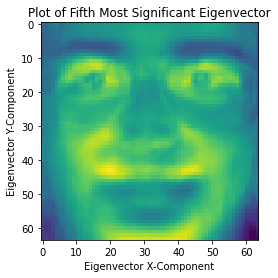

In [15]:
reshaped_eigface = np.rot90(pca.components_[4].reshape(64, 64), k=1, axes=(1,0))
plt.imshow(reshaped_eigface)
plt.title("Plot of Fifth Most Significant Eigenvector")
plt.xlabel("Eigenvector X-Component")
plt.ylabel("Eigenvector Y-Component")
plt.show()

g) Reconstruct image using principal components

In [16]:
#Define function to perform PCA reconstruction

def pcaReconstruction(img, comp):
  reconstructed_img = np.zeros((64, 64))

  for component in range(comp):

    #Retrieve each eigenvector, formulate into array, take transpose and combine
    #Then multiply each transformation by the 100th mean-removed image sample
    #Add it on and repeat process over each eigenvector as per reconstruction formula 
    
    e = np.rot90(pca.components_[component].reshape(64, 64), k=1, axes=(1,0))
    e_T = np.transpose(e)
    e_e_T = np.matmul(e, e_T)
    pc_img = np.matmul(e_e_T, rem_mean_images[img])
    reconstructed_img = np.add(reconstructed_img, pc_img)
    
    # #Complex numbers get involved in matrix operations, hence set casting to unsafe to deal with it
    # transformed_img = np.add(transformed_img, e_e_T*org_img, casting="unsafe")
  
  return reconstructed_img

In [17]:
#List comprehension to compute reconstructed images for 100th image using 10, 100, 200, 399 principal components

reconstructed_img = [pcaReconstruction(99, i) for i in [10, 100, 200, 399]]

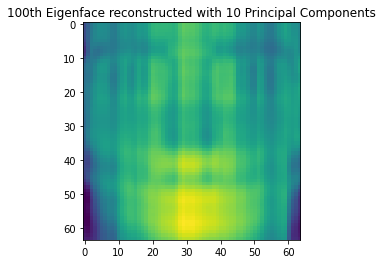

In [18]:
plt.imshow(reconstructed_img[0], interpolation='None')
plt.title("100th Eigenface reconstructed with 10 Principal Components")
plt.show()

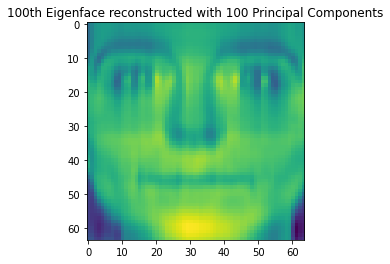

In [19]:
plt.imshow(reconstructed_img[1], interpolation='None')
plt.title("100th Eigenface reconstructed with 100 Principal Components")
plt.show()

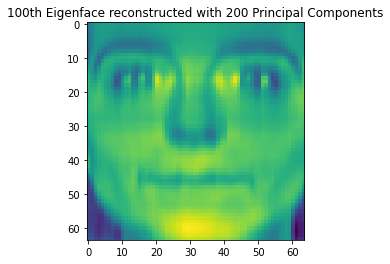

In [20]:
plt.imshow(reconstructed_img[2], interpolation='None')
plt.title("100th Eigenface reconstructed with 200 Principal Components")
plt.show()

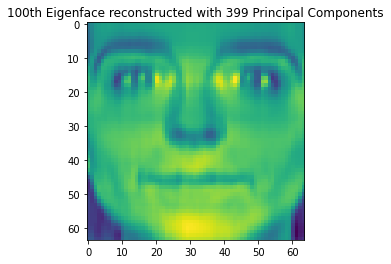

In [21]:
plt.imshow(reconstructed_img[3], interpolation='None')
plt.title("100th Eigenface reconstructed with 399 Principal Components")
plt.show()